### The dataset is available at - https://www.kaggle.com/mylesoneill/world-university-rankings

### Load all the libraries and include matplotlib line to make all the plots static within the IPython notebook

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

### Read in the data using the read_csv function

In [331]:
cwurData = pd.read_csv("data/cwurData.csv")
shanghaiData = pd.read_csv("data/shanghaiData.csv")
timesData = pd.read_csv("data/timesData.csv")

### Check if CU Boulder is present in the institution column

In [332]:
"University of Colorado Boulder" in cwurData['institution'].unique()

True

In [333]:
cwur_cu_ranking = cwurData[cwurData.institution.isin(["University of Colorado Boulder"])][['world_rank', 'year']]
cwur_cu_ranking['survey'] = "CWUR"
cwur_cu_ranking

,world_rank,year,survey
45,46,2012,CWUR
140,41,2013,CWUR
262,63,2014,CWUR
1253,54,2015,CWUR


### Repeat the same for Times and Shanghai data

In [334]:
"University of Colorado Boulder" in timesData['university_name'].unique()

True

In [335]:
times_cu_ranking = timesData[timesData.university_name.isin(["University of Colorado Boulder"])][['world_rank', 'year']]
times_cu_ranking['survey'] = "Times"

In [336]:
"University of Colorado at Boulder" in shanghaiData['university_name'].unique()

True

In [337]:
shanghai_cu_ranking = shangaiData[shanghaiData.university_name.isin(["University of Colorado at Boulder"])][['world_rank', 'year']]
shanghai_cu_ranking['survey'] = "Shanghai"

### Combine the three dataframes into a single dataframe using the append function

In [338]:
all_university_rankings = cwur_cu_ranking.append(times_cu_ranking).append(shanghai_cu_ranking)
all_university_rankings.head(10)

,world_rank,year,survey
45,46,2012,CWUR
140,41,2013,CWUR
262,63,2014,CWUR
1253,54,2015,CWUR
66,67,2011,Times
277,77,2012,Times
692,91,2013,Times
1098,97,2014,Times
1498,97,2015,Times
1930,=127,2016,Times


### Strip out non-numeric values from the world_rank column using regex, apply and lambda

* Apply is used to call a function on a series element or a dataframe
* Lambda is just a cool way of saying functions

In [339]:
all_university_rankings['world_rank'] = all_university_rankings['world_rank'].apply(lambda x : re.sub("[^0-9]", "", str(x)))
all_university_rankings.head(20)

,world_rank,year,survey
45,46,2012,CWUR
140,41,2013,CWUR
262,63,2014,CWUR
1253,54,2015,CWUR
66,67,2011,Times
277,77,2012,Times
692,91,2013,Times
1098,97,2014,Times
1498,97,2015,Times
1930,127,2016,Times


In [340]:
all_university_rankings['world_rank'] = all_university_rankings['world_rank'].astype(int)

* Create a groupby variable that groups the **all_university_ranking** dataframe by **survey**
* Unpack the subplot tuple into a **_figure_** variable and a **_subplot_** variable
* Create a point plot for each group with **year** on the **x_axis** and **world_rank** on the **y_axis** 

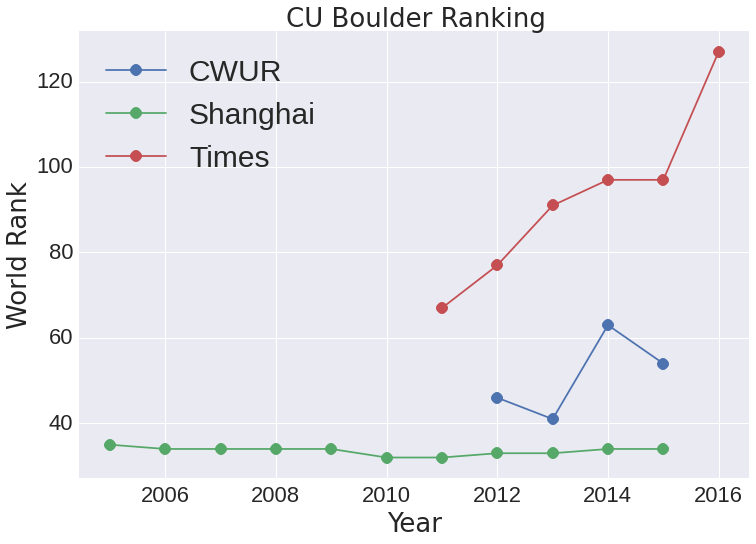

In [341]:
groups = all_university_rankings.groupby('survey')

fig, ax = plt.subplots()
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.year, group.world_rank, marker='o', linestyle='-', ms=12, label=name)
    
ax.legend(loc=2,prop={'size':30})

plt.title("CU Boulder Ranking", fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)    
plt.ylabel("World Rank", fontsize=26)  
plt.xlabel("Year", fontsize=26)
plt.show()

### Let's see which countries have the highest educational ratings

* Create a groupby variable that groups scores based on the country
* After that, use the **agg()** function to calculate different statistics (mean score and university count)

In [342]:
cwur_agg = cwurData.groupby(['country'])['score'].agg(['mean','count']).reset_index()
cwur_agg.head()

,country,mean,count
0,Argentina,44.672857,7
1,Australia,45.825517,58
2,Austria,45.139583,24
3,Belgium,47.011000,20
4,Brazil,44.781111,36


### Sort the universities based on the descending order of the mean score

In [343]:
sorted_frame = cwur_agg.sort('mean', ascending=False)
sorted_frame.head(20)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,country,mean,count
26,Israel,52.654091,22
54,USA,51.839860,573
50,Switzerland,51.208846,26
43,Singapore,50.160000,5
57,United Kingdom,49.474653,144
33,Netherlands,47.958276,29
49,Sweden,47.890000,24
13,Denmark,47.774167,12
40,Russia,47.381111,9
6,Canada,47.359306,72
